100%|██████████| 4000/4000 [00:02<00:00, 1672.21it/s]


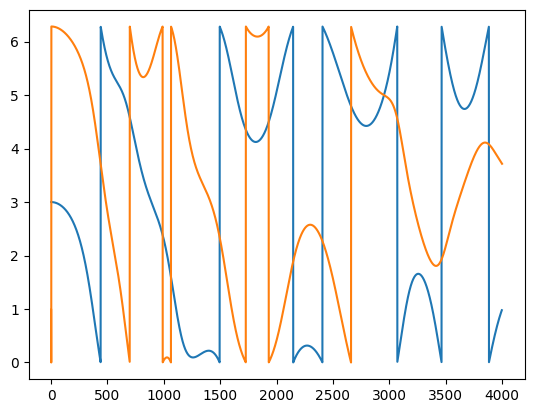

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dynamics import core, creator, model
from dynamics.asset import Asset
from dynamics.tools import Body, rotation, solution
from dynamics.tools.solver import RK4

simulation = core.Simulation()

body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0.3, 'length':1})
sol = solution.Solution(disp_0=3.0, velo_0=0)
asset = Asset(**{'name': 'mass', 'var_name': 'theta', 'component': body, 'motion_func': rotation, 'solution': sol})
sol_1 = solution.Solution(disp_0=0, velo_0=0)
asset_1 = Asset(**{'name': 'mass1', 'var_name': 'theta1', 'component': body, 'motion_func': rotation, 'solution': sol_1, 'connection': asset})

simulation.register('model', model.Model([asset, asset_1]))
simulation.register('solver', RK4)

simulation.set_paramters(time_step=2.5e-3, time_end=10)
simulation.run()



In [ ]:
solu = simulation.results
plt.plot(solu['displacement'].values[:4000]%(2*np.pi))
plt.plot(solu['displacement'].values[4000:]%(2*np.pi))
plt.show()